# Loading data

In [112]:
import pandas as pd
import csv
import chardet

#LOAD the Data

shear_df = pd.read_csv('Dataset/reading_data.csv',sep=",",header=None)

new_header2 = shear_df.iloc[0] 
shear_df = shear_df[1:] 
shear_df.columns = new_header2 

#shear_df = shear_df[shear_df['Foam_quality'] == '95']
#shear_df = shear_df[shear_df['Temperature'] == '25']

shear_df

,Foam_quality,Temperature,Foam_CO2,Foam_AOS,Foam_NaCl,Foam_SiO2,Foam_XG,Pa,shear_rate,viscosity_cp
1,95,25,Yes,Yes,No,No,No,1.94,311,6.2
2,95,25,Yes,Yes,No,No,No,2.74,467,5.5
3,95,25,Yes,Yes,No,No,No,2.93,622,5.1
4,95,25,Yes,Yes,No,No,No,3.50,778,4.8
5,95,25,Yes,Yes,No,No,No,4.37,933,4.6
...,...,...,...,...,...,...,...,...,...,...
164,75,80,Yes,Yes,Yes,Yes,Yes,1.63,641.68,2.65
165,75,80,Yes,Yes,Yes,Yes,Yes,1.86,802.11,2.46
166,75,80,Yes,Yes,Yes,Yes,Yes,1.97,962.53,2.31
167,75,80,Yes,Yes,Yes,Yes,Yes,2.59,1122.95,2.19


In [113]:
shear_df.describe()

,Foam_quality,Temperature,Foam_CO2,Foam_AOS,Foam_NaCl,Foam_SiO2,Foam_XG,Pa,shear_rate,viscosity_cp
count,168,168,168,168,168,168,168,168,168,168
unique,2,3,1,1,2,2,2,127,168,132
top,95,80,Yes,Yes,Yes,Yes,No,1.49,842.38,1.91
freq,84,56,168,168,126,84,126,4,1,4


In [114]:
#from sklearn.preprocessing import LabelEncoder
#shear_df['Foam_CO2']=LabelEncoder().fit_transform(shear_df['Foam_CO2'])

shear_df['CO2']=shear_df.Foam_CO2.map({'No':0, 'Yes':1})
shear_df['AOS']=shear_df.Foam_AOS.map({'No':0, 'Yes':1})
shear_df['NaCl']=shear_df.Foam_NaCl.map({'No':0, 'Yes':1})
shear_df['SiO2']=shear_df.Foam_SiO2.map({'No':0, 'Yes':1})
shear_df['XG']=shear_df.Foam_XG.map({'No':0, 'Yes':1})

shear_df

,Foam_quality,Temperature,Foam_CO2,Foam_AOS,Foam_NaCl,Foam_SiO2,Foam_XG,Pa,shear_rate,viscosity_cp,CO2,AOS,NaCl,SiO2,XG
1,95,25,Yes,Yes,No,No,No,1.94,311,6.2,1,1,0,0,0
2,95,25,Yes,Yes,No,No,No,2.74,467,5.5,1,1,0,0,0
3,95,25,Yes,Yes,No,No,No,2.93,622,5.1,1,1,0,0,0
4,95,25,Yes,Yes,No,No,No,3.50,778,4.8,1,1,0,0,0
5,95,25,Yes,Yes,No,No,No,4.37,933,4.6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,75,80,Yes,Yes,Yes,Yes,Yes,1.63,641.68,2.65,1,1,1,1,1
165,75,80,Yes,Yes,Yes,Yes,Yes,1.86,802.11,2.46,1,1,1,1,1
166,75,80,Yes,Yes,Yes,Yes,Yes,1.97,962.53,2.31,1,1,1,1,1
167,75,80,Yes,Yes,Yes,Yes,Yes,2.59,1122.95,2.19,1,1,1,1,1


# Visualize shear_rate vs viscosity (cP) using scatter plot

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

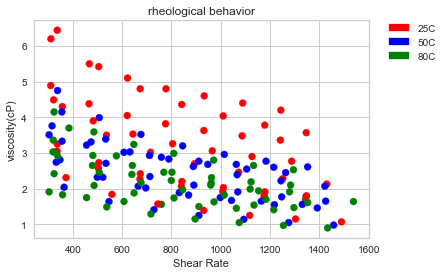

In [116]:
fig, ax = plt.subplots()


shear_df.viscosity_cp=pd.to_numeric(shear_df.viscosity_cp)
shear_df.shear_rate=pd.to_numeric(shear_df.shear_rate)
colors = {'25':'red', '50':'blue', '80':'green'}
scatter = ax.scatter(shear_df.shear_rate, shear_df.viscosity_cp,  c=shear_df.Temperature.apply(lambda x: colors[x]))


# build the legend
red_patch = mpatches.Patch(color='red', label='25C')
blue_patch = mpatches.Patch(color='blue', label='50C')
green_patch = mpatches.Patch(color='green', label='80C')

# set up for handles declaration
patches = [red_patch, blue_patch, green_patch]

# alternative declaration for placing legend outside of plot
legend = ax.legend(handles=patches,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('rheological behavior')
plt.xlabel('Shear Rate')
plt.ylabel('viscosity(cP)')

plt.show()

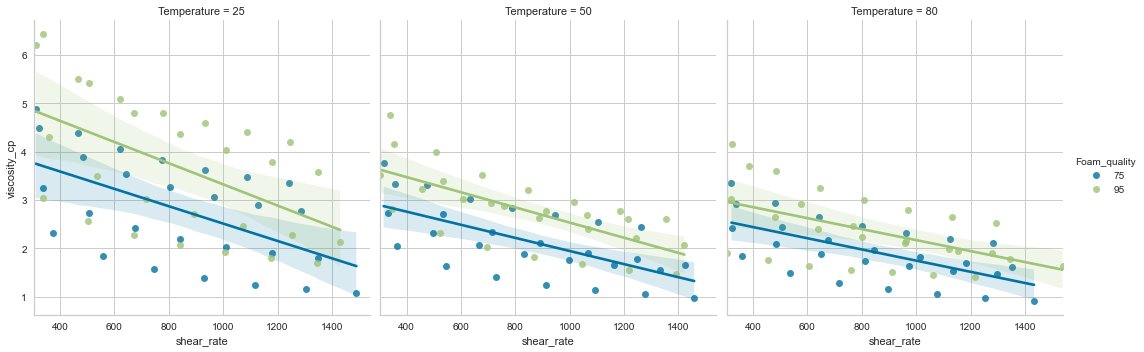

In [117]:
sns.lmplot(data=shear_df, x="shear_rate", y="viscosity_cp", col="Temperature", hue="Foam_quality" )

In [118]:
#sns.scatterplot(data=shear_df, x="shear_rate", y="viscosity_cp", hue="Temperature" )#shear_df.Temperature.tolist())

C:\Users\maab_\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


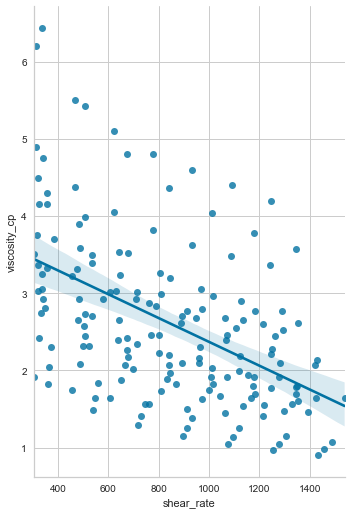

In [119]:
sns.pairplot(shear_df, x_vars='shear_rate', y_vars='viscosity_cp', size=7, aspect=0.7, kind='reg')

# Estimate Model Coefficients

In [120]:
### STATSMODELS ###
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='shear_rate ~ viscosity_cp', data=shear_df).fit()

# print the coefficients
lm1.params

Intercept       1248.713351
viscosity_cp    -155.958268
dtype: float64

<AxesSubplot:xlabel='shear_rate'>

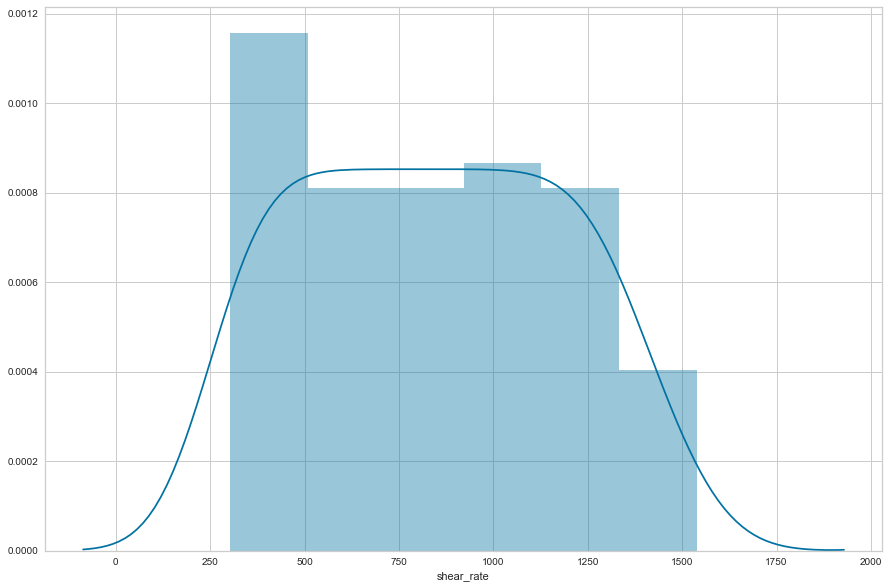

In [121]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(shear_df['shear_rate'])

## Selecting features and target variable

In [122]:

#feature_cols = ['Foam_quality','Temperature', 'CO2', 'AOS', 'NaCl', 'SiO2', 'XG','Pa', 'shear_rate']
feature_cols = ['shear_rate']


X = shear_df[feature_cols] # Features
y = shear_df.viscosity_cp # Target variable

# Data splitting

In [123]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## Fit data to a Linear Regression model
- regression technique will find a linear relationship between x (shear_rate) and y(cP)

- linear regression algorithm fits multiple lines on the data points and returns the line that results in the least error

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate the model (using the default parameters)
logreg = LinearRegression()
scores = cross_val_score(logreg, X_train, y_train, scoring='r2', cv=5)
scores 

array([-0.03067241,  0.19025848,  0.35525913,  0.15322064,  0.31809081])

In [125]:
# fit the model with data
logreg.fit(X_train,y_train)

LinearRegression()

C:\Users\maab_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


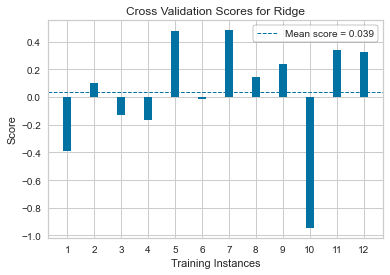

<AxesSubplot:title={'center':'Cross Validation Scores for Ridge'}, xlabel='Training Instances', ylabel='Score'>

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import CVScores

# Instantiate the regression model and visualizer
cv = KFold(n_splits=12, random_state=42)

model = Ridge()
visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()    

# Model Coefficients ( β1 )
Y= mx + b. 
(b is the intercept and m is the slope of the line)

*Interpretation
- Intercept: for every one unit of change in shear rate, the change in the cP is about 0.002%.

In [127]:
#To retrieve the intercept:
print(logreg.intercept_)
#For retrieving the slope:
print(logreg.coef_)

3.9432044408108706
[-0.00154647]


# Predict (cP) using the Model (y=β0+β1x)

In [128]:

# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
152,1.05,2.280440
57,3.03,3.448628
124,1.14,2.252139
61,2.10,2.459490
101,2.42,2.901038
52,3.52,2.897327
8,3.05,3.423451
6,4.40,2.259098
87,3.53,2.947386
136,3.03,2.966361


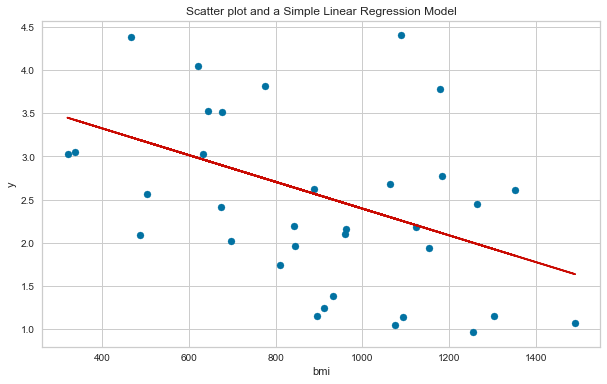

In [129]:
# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

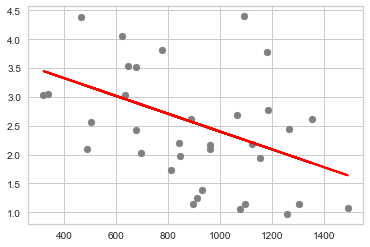

In [130]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [131]:
from sklearn import metrics

# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7637679432549952
0.8035641736259067
0.8964174103763863


# Confidence in the Model

In [132]:
# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,1128.620544,1368.806158
viscosity_cp,-198.438581,-113.477955


# Hypothesis Testing and p-values

In [133]:
lm1.pvalues

Intercept       2.027156e-47
viscosity_cp    1.516264e-11
dtype: float64

In [134]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.240414929062029

In [135]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
logreg.score(X, y)

0.23975832034635547

In [136]:
### STATSMODELS ###

# create a fitted model with all 9 features
lm1 = smf.ols(formula='viscosity_cp ~ Foam_quality + Temperature + CO2 + AOS + NaCl + XG + Pa + shear_rate', data=shear_df).fit()

# print the coefficients
lm1.params

Intercept             1.147164
Foam_quality[T.95]    0.259316
Temperature[T.50]    -0.422641
Temperature[T.80]    -0.505132
Pa[T.0.39]           -0.244432
                        ...   
CO2                   1.147164
AOS                   1.147164
NaCl                 -0.232355
XG                    0.568127
shear_rate           -0.002662
Length: 135, dtype: float64

In [137]:
# pair the feature names with the coefficients
list(zip(feature_cols, logreg.coef_))

[('shear_rate', -0.0015464701573784229)]

In [138]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           viscosity_cp   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     7.154
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.81e-09
Time:                        09:36:31   Log-Likelihood:                 29.627
No. Observations:                 168   AIC:                             206.7
Df Residuals:                      35   BIC:                             622.2
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1472      0.192      5.985      0.000       0.758       1.536
Foam_quality[T.95]     0.2593      0.161      1.607      0.117      -0.068       0.587
Temperature[T.50]     -0.4226      0.184     -2.299      0.028      -0.796      -0.050
Temperature[T.80]     -0.5051      0.254     -1.992      0.054      -1.020       0.010
Pa[T.0.39]            -0.2444      0.631     -0.387      0.701      -1.526       1.037
Pa[T.0.75]             0.0802      0.655      0.122      0.903      -1.249       1.409
Pa[T.0.79]             0.6904      0.656      1.053      0.300      -0.641       2.022
Pa[T.0.80]             0.2173      0.646      0.337      0.738      -1.093       1.528
Pa[T.0.83]             0.5793      0.657      0.881      0.384      -0.755       1.914
Pa[T.0.85]             0.2239      0.670      0.334      0.740      -1.137       1.585
Pa[T.0.86]             0.3091      0.672      0.460      0.648      -1.055       1.673
Pa[T.0.92]             0.4943      0.643      0.769      0.447      -0.811       1.800
Pa[T.0.99]             0.8393      0.671      1.251      0.219      -0.523       2.201
Pa[T.1.01]             0.5810      0.583      0.997      0.326      -0.602       1.764
Pa[T.1.02]             0.4236      0.534      0.793      0.433      -0.661       1.508
Pa[T.1.03]             0.8314      0.648      1.283      0.208      -0.484       2.147
Pa[T.1.04]             0.8024      0.619      1.296      0.203      -0.454       2.059
Pa[T.1.05]             0.6809      0.647      1.052      0.300      -0.633       1.995
Pa[T.1.08]             0.1182      0.680      0.174      0.863      -1.263       1.500
Pa[T.1.12]             1.2085      0.660      1.832      0.075      -0.130       2.548
Pa[T.1.14]             0.8621      0.671      1.285      0.207      -0.500       2.224
Pa[T.1.15]             0.6168      0.612      1.007      0.321      -0.626       1.860
Pa[T.1.16]             0.8478      0.547      1.551      0.130      -0.262       1.958
Pa[T.1.18]             0.6189      0.639      0.969      0.339      -0.678       1.916
Pa[T.1.21]             0.9026      0.643      1.403      0.169      -0.403       2.208
Pa[T.1.22]             1.6056      0.678      2.369      0.023       0.230       2.981
Pa[T.1.23]             0.9295      0.589      1.579      0.123      -0.266       2.125
Pa[T.1.25]             1.2462      0.725      1.718      0.095      -0.226       2.719
Pa[T.1.27]             1.0550      0.676      1.560      0.128      -0.318       2.428
Pa[T.1.28]             0.4437      0.682      0.651      0.519      -0.940       1.828
Pa[T.1.29]             1.3347      0.586      2.279      0.029       0.146       2.524
Pa[T.1.30]             1.6599      0.743      2.234      0.032       0.152       3.168
Pa[T.1.33]             0.9633      0.6

# Feature Selection

In [139]:
### STATSMODELS ###

# only include X and Y in the model

# instantiate and fit model
lm1 = smf.ols(formula='viscosity_cp ~ shear_rate', data=shear_df).fit()

# calculate r-square 
lm1.rsquared

0.240414929062029

In [140]:
### STATSMODELS ###

# only include X and Y in the model

# instantiate and fit model
lm1 = smf.ols(formula='viscosity_cp ~ Pa + shear_rate', data=shear_df).fit()

# calculate r-square 
lm1.rsquared

0.9548225013460407

In [141]:
### STATSMODELS ###

# only include X and Y in the model

# instantiate and fit model
lm1 = smf.ols(formula='viscosity_cp ~ Foam_quality + Temperature + Pa + shear_rate', data=shear_df).fit()

# calculate r-square 
lm1.rsquared

0.9591613374153249

In [142]:
# add Foam(CO2,AOS,NaCl,SiO2,XG) to the model (which we believe has no association with cP)
lm1 = smf.ols(formula='viscosity_cp ~ Foam_quality + Temperature + CO2 + AOS + NaCl + XG + Pa + shear_rate', data=shear_df).fit()
lm1.rsquared

0.964260602708587

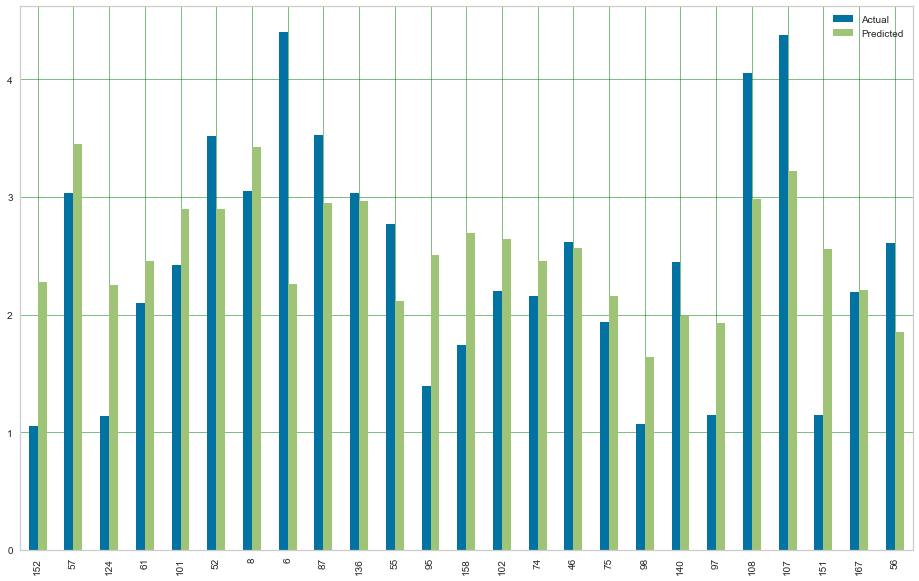

In [143]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Model Evaluation

In [144]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.8964174103763863


# Compare

In [145]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = ['Pa', 'shear_rate']

X = shear_df[feature_cols] # Features
y = shear_df.viscosity_cp # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
logreg = LinearRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.27061096812146274
0.11834916695197274
0.34401913747925816


In [146]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = ['Foam_quality','Temperature', 'CO2', 'AOS', 'NaCl', 'SiO2', 'XG','Pa', 'shear_rate']
#feature_cols = [ 'shear_rate']

X = shear_df[feature_cols] # Features
y = shear_df.viscosity_cp # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
logreg = LinearRegression()

# fit the model with data
logreg.fit(X_train,y_train)
# try the testset
y_pred=logreg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# calculate MAE, MSE, RMSE
#MAE
print(metrics.mean_absolute_error(y_test, y_pred))
#MSE
print(metrics.mean_squared_error(y_test, y_pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.2594625372249355
0.10240306187031617
0.32000478413660655


In [147]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
logreg.conf_int()

AttributeError: 'LinearRegression' object has no attribute 'conf_int'

In [148]:
# import the metrics class

from sklearn.metrics import confusion_matrix

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted.round()))

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [149]:
# Creating some predictions.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

NameError: name 'sgd_clf' is not defined

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported

## precision and recall

In [151]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_pred)
recall_score(y_train, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [134, 34]

## F1 score

In [152]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [134, 34]

NameError: name 'cnf_matrix' is not defined

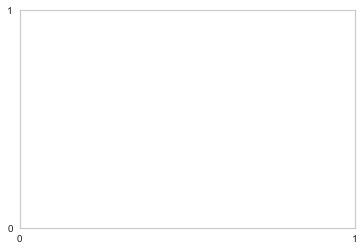

In [153]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [154]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

ValueError: continuous is not supported

In [155]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'